In [1]:
import numpy as np
from scipy import signal
import scipy.fft
from scipy.fft import rfftfreq
import matplotlib.pyplot as plt
import os

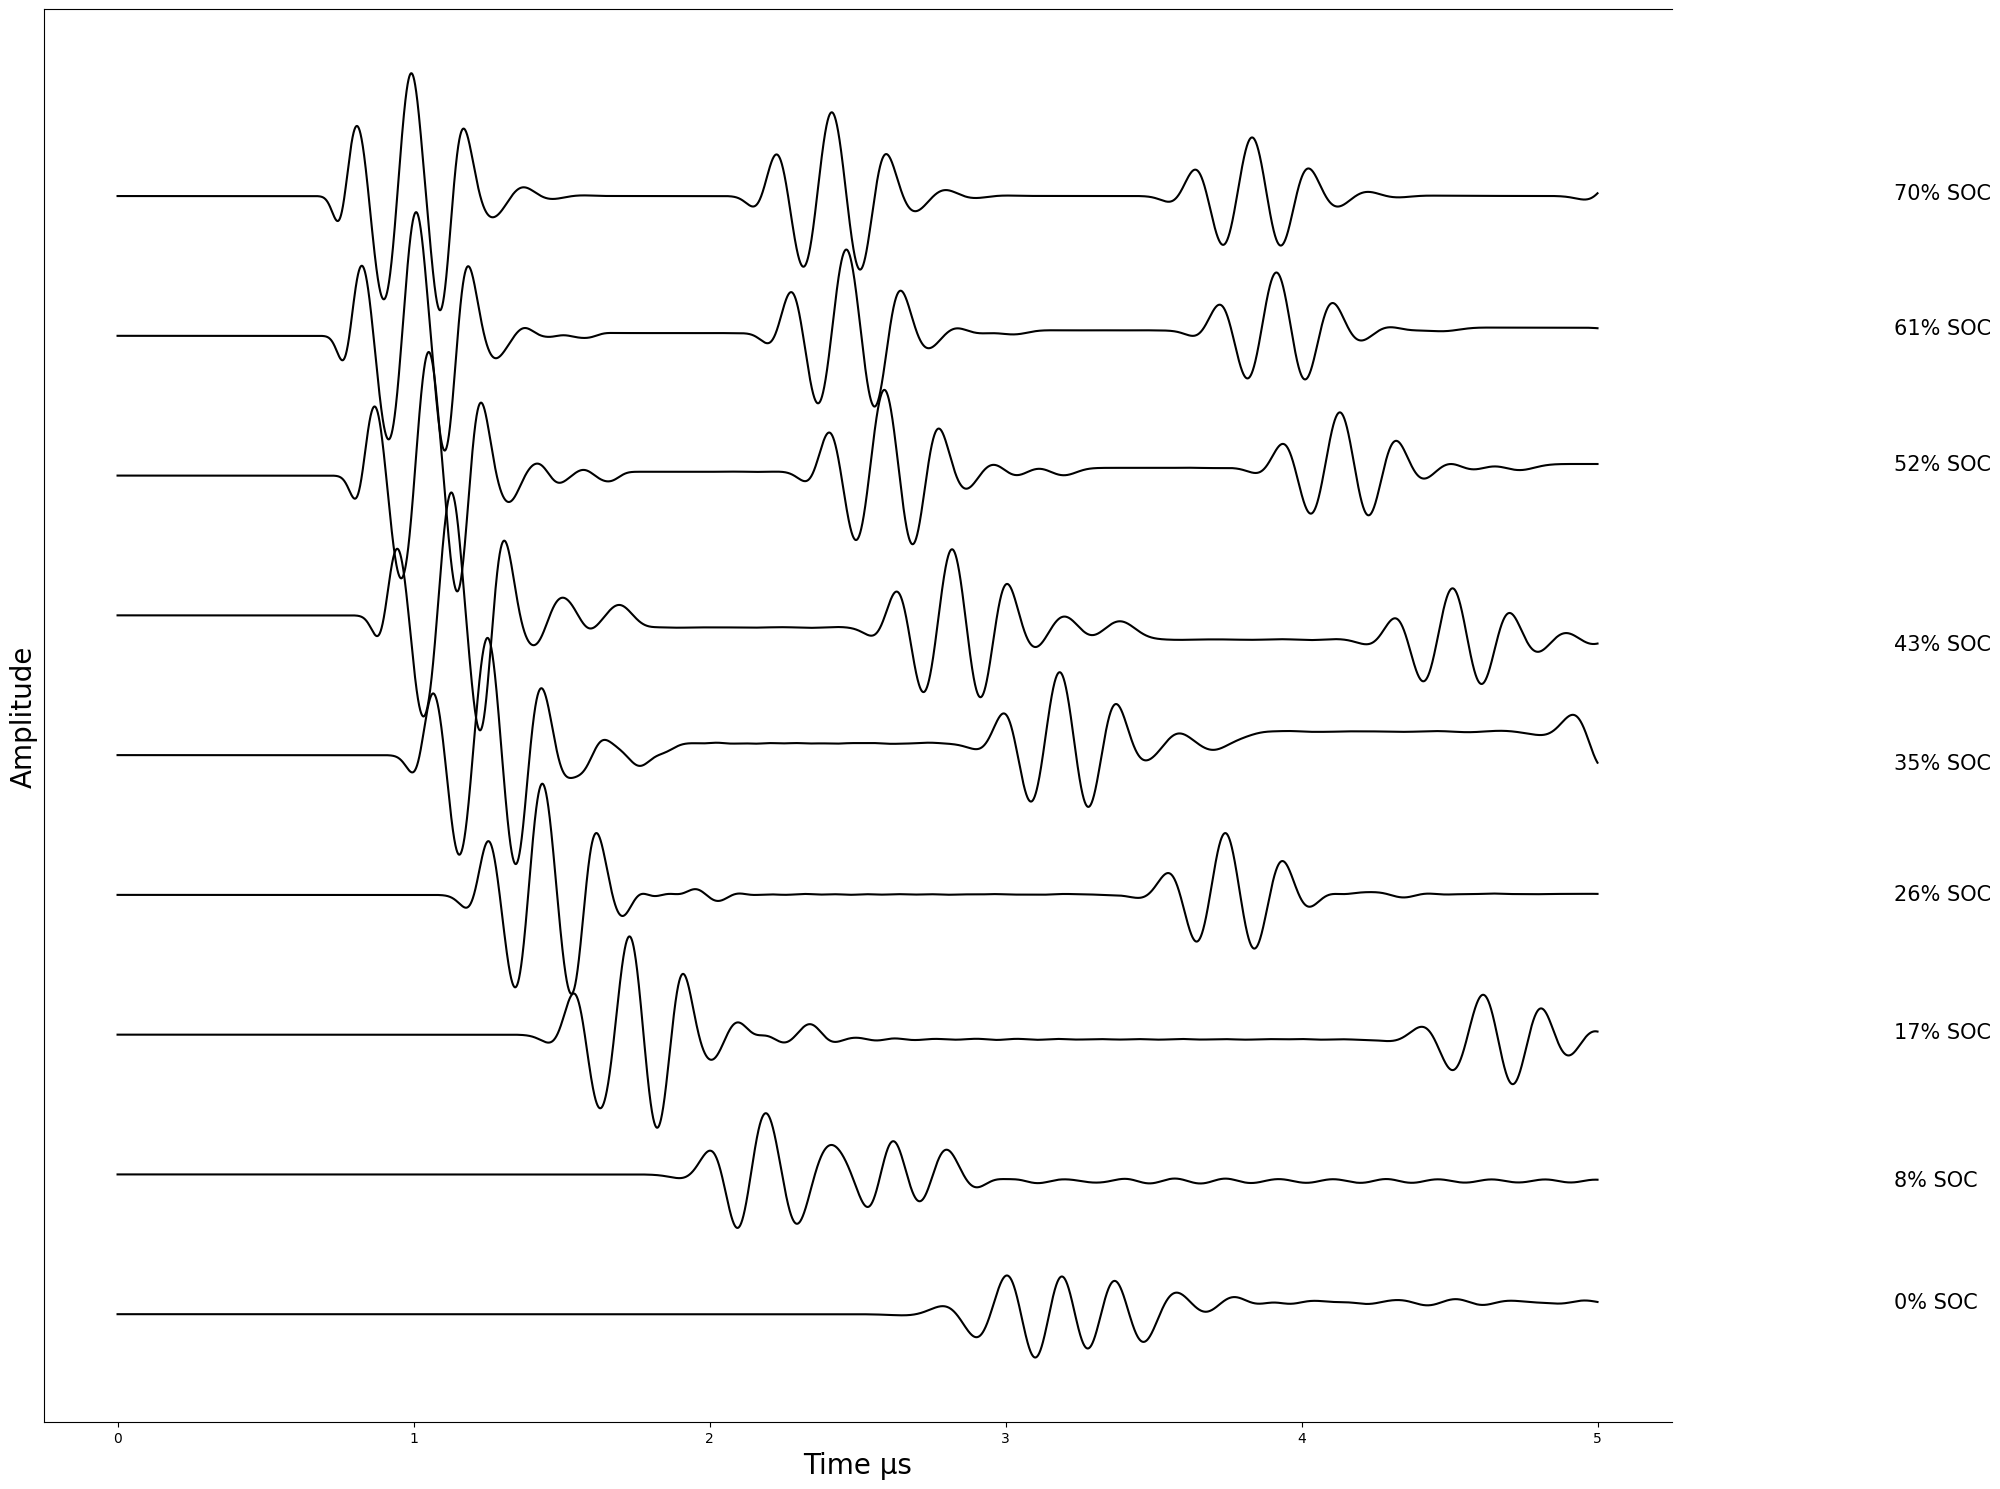

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt

def plot_npy_files(directory):
    # Get all .npy files in the directory
    npy_files = [f for f in os.listdir(directory) if f.endswith('.npy')]
    npy_files.sort()  # Sort files alphabetically (optional)
    
    num_files = len(npy_files)
    num_subplots = min(num_files, 11)  # Maximum 11 plots
    
    if num_files == 0:
        print("No .npy files found in the directory.")
        return
    
    fig, ax = plt.subplots(figsize=(20, 15))  # Adjusted for a tall layout
    
    soc_labels = np.linspace(0, 70, num_subplots)  # Generate SOC labels from 0% to 100%
    offset = 1.5  # Vertical offset between lines
    
    for i, file in enumerate(npy_files[:11]):
        file_path = os.path.join(directory, file)
        data = np.load(file_path)
        
        if data.ndim < 2:
            print(f"Skipping {file}: Not a 2D array.")
            continue
        
        last_column = data[-1,:]  # Extract last column
        x_values = np.arange(len(last_column)) * 5e-4  # Adjust x-axis scale
        
        ax.plot(x_values, last_column + i * offset, color='black')  # Offset each line
        
        # Add text label to the right side
        ax.text(x_values[-1] + 0.2 * (x_values[-1] - x_values[0]), 
                last_column[-1] + i * offset, 
                f"{int(soc_labels[i])}% SOC", 
                verticalalignment='center', fontsize=15)
    
    ax.set_xlabel(("Time "u"\u03bcs"), fontsize=20)
    ax.set_ylabel("Amplitude", fontsize=20)
    ax.set_yticks([])  # Remove y-ticks
    ax.spines['left'].set_visible(True)  # Hide left spine
    ax.spines['right'].set_visible(False)  # Hide right spine
    
    plt.tight_layout()
    plt.show()

    # Example usage
plot_npy_files("./")

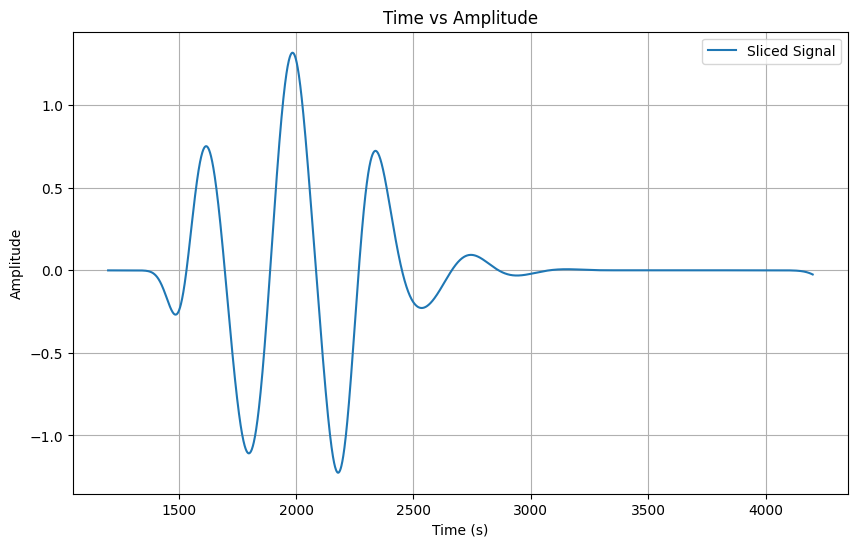

In [39]:
def slice_tof(file, first_limit, second_limit, dt, name):
    """
    Slice the solution from a .npy file and return a characteristic peak.
    Also, saves a plot of the sliced signal.
    """
    # Load data from .npy file
    H = np.load(file)
    amplitudes = H[-1, first_limit:second_limit]
    first_limit_time = first_limit #* dt
    second_limit_time = second_limit# * dt
    times = np.linspace(first_limit_time, second_limit_time, amplitudes.size)
    signal_sliced = np.array([times, amplitudes])

    # Save sliced data to a new file
    output_path = "../fig 11 propagation 256 layers and 5 MHz"
    
    os.chdir(output_path)
    np.save(f'{name}', signal_sliced.T)

    # Create a plot of the sliced signal
    plt.figure(figsize=(10, 6))
    plt.plot(times, amplitudes, label='Sliced Signal')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Time vs Amplitude')
    plt.legend()
    plt.grid(True)
    #plt.savefig(f'{output_path}\\{name}.png')  # Save the figure
    plt.show()

# Example usage
file_path = "../fig 11 propagation 256 layers and 5 MHz/nodes_f1100_dt_f0.0005_layer_n_256_80.npy"
slice_tof(file_path, 1200,4200, 0.0005, '80')

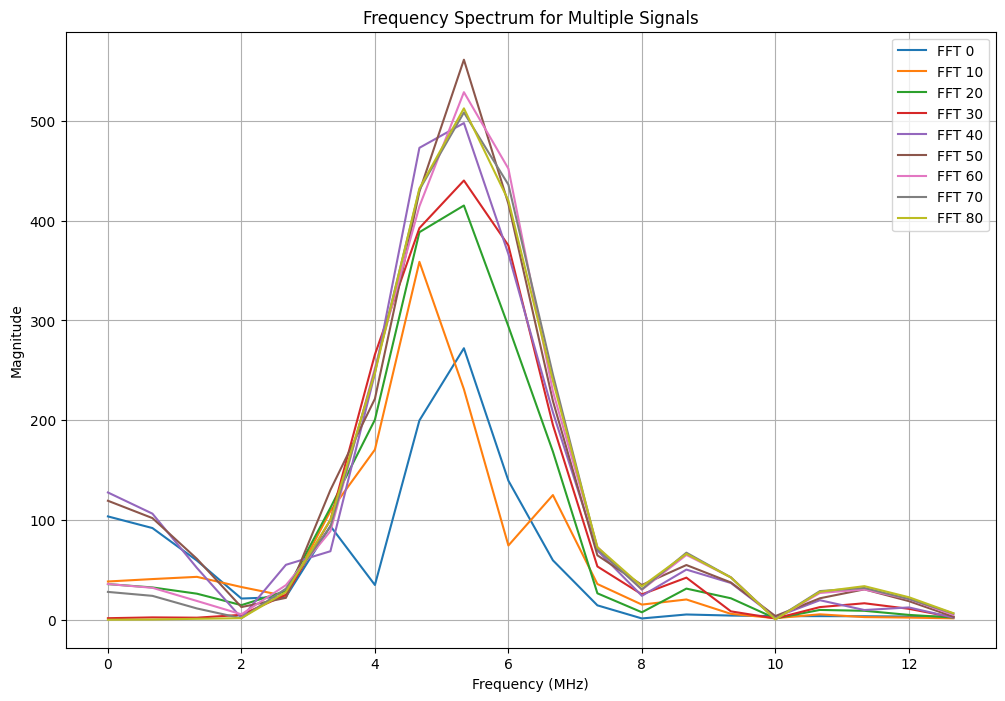

In [41]:
def fft(signal):
    fft_signal = np.abs(scipy.fft.rfft(signal))
    d = 5e-4  # Sampling interval
    freq = rfftfreq(signal.size, d)
    return freq, fft_signal

# Define the range of file indices and the increment
start, end, step = 0, 81, 10

# Prepare to collect frequency data for plotting
all_frequencies = []
all_fft_outputs = []

for i in range(start, end, step):
    file_name = f"{i}.npy"  # Generate the filename dynamically
    signal = np.load(file_name)
    
    # Assuming the signal is 2D and we need the second column
    if signal.ndim > 1 and signal.shape[1] >= 2:
        frequency, fft_output = fft(signal[:, 1])
    else:
        # Handle the case where the signal is not as expected
        continue
    
    # Slice to keep only the first 20 elements
    frequency = frequency[:20]
    fft_output = fft_output[:20]
    
    # Save the FFT output to a file with only the first 20 points
    np.save(f"fft_{i}_first_10", {'frequency': frequency, 'fft_output': fft_output})  # Save FFT magnitude data
    
    # Collect data for plotting
    all_frequencies.append(frequency)
    all_fft_outputs.append(fft_output)

# Plotting all FFT results
plt.figure(figsize=(12, 8))
for idx, fft_output in enumerate(all_fft_outputs):
    plt.plot(all_frequencies[idx], fft_output, label=f'FFT {start + idx * step}')
plt.title('Frequency Spectrum for Multiple Signals')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)
plt.show()

177.80567955367144 -660.738732679081 199.83885893708714
45.35359742494552 41.798700237951486 358.6593097956727
160.87708311116083 -416.1124424863913 388.3409601455799
130.66056615786093 -243.6095499124196 392.44314137050816
188.08968076125984 -471.98945980590787 472.81123002862716
254.6150738988176 -784.364693766351 428.93163961190993
207.2094451389929 -568.6252414557915 414.26544091026915
194.0791440044808 -509.5450562074026 430.81763056144416
198.6844133699196 -529.8999751265255 432.13171077807186


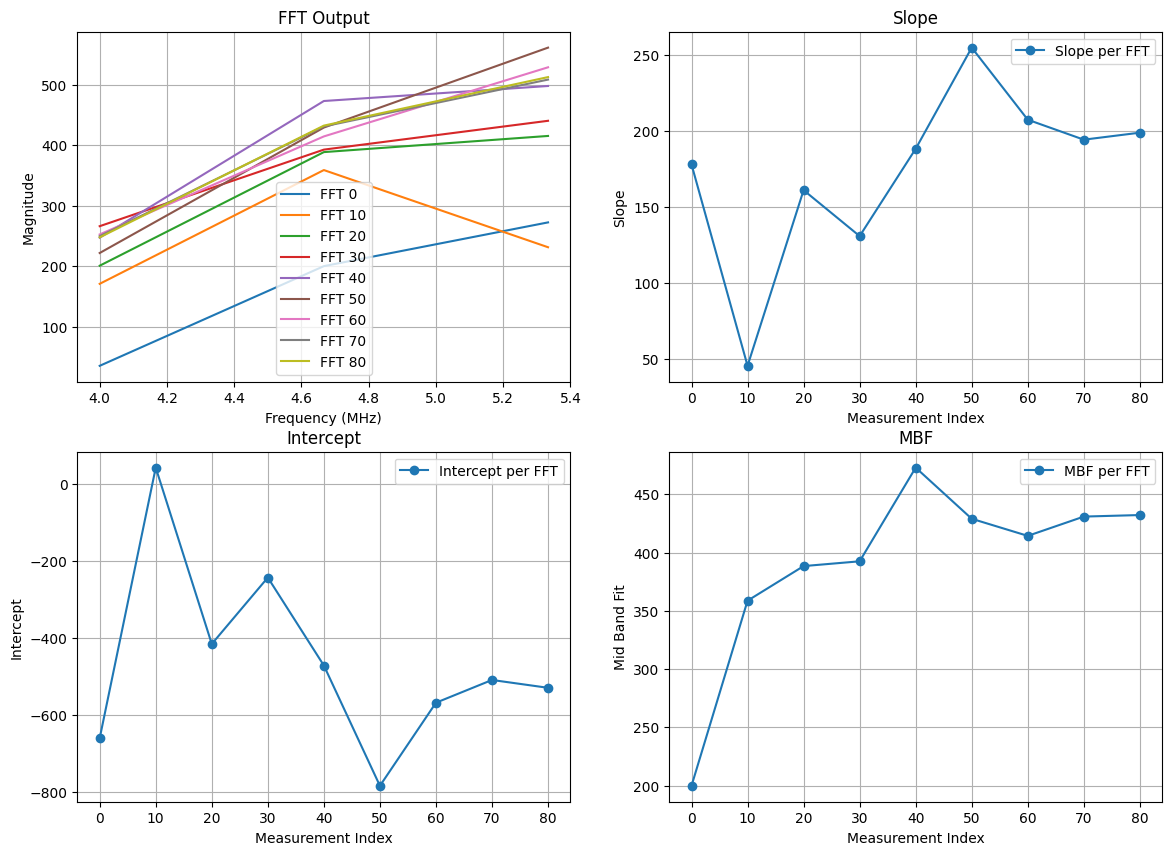

In [ ]:
import numpy as np
import scipy.fft
import matplotlib.pyplot as plt

# Define the range of file indices and the increment
start, end, step = 0, 81, 10

# Prepare to collect frequency data for plotting
all_frequencies = []
all_fft_outputs = []
all_slopes = []
all_intercepts = []
all_mid_band_fits = []
i_values = []  # List to store 'i' values

for i in range(start, end, step):
    file_name = f"{i}.npy"  # Generate the filename dynamically
    signal = np.load(file_name)
    
    # Assuming the signal is 2D and we need the second column
    if signal.ndim > 1 and signal.shape[1] >= 2:
        frequency, fft_output = fft(signal[:, 1])
    else:
        # Handle the case where the signal is not as expected
        continue
    
    # Find indices where the frequency is between 3.8 and 5.5 MHz
    mask = (frequency >= 3.5) & (frequency <= 5.5)
    frequency = frequency[mask]
    fft_output = fft_output[mask]

    slope, intercept = np.polyfit(frequency, fft_output, 1)
    
    # Find the Mid Band Fit at 4.65 MHz
    closest_index = np.abs(frequency - 4.65).argmin()
    mid_band_fit = fft_output[closest_index]
    
    # Save the FFT output to a file with only the desired frequency range and fit data
    np.save(f"fft_{i}_3.8_5.5MHz", {'frequency': frequency, 'fft_output': fft_output, 'slope': slope, 'intercept': intercept,
                                     'mid_band_fit': mid_band_fit})
    print(slope, intercept,mid_band_fit)
    
    # Collect data for plotting
    all_frequencies.append(frequency)
    all_fft_outputs.append(fft_output)
    all_slopes.append(slope)
    all_intercepts.append(intercept)
    all_mid_band_fits.append(mid_band_fit)
    i_values.append(i)

# Plotting all results
plt.figure(figsize=(14, 10))

# Plot fft_output
plt.subplot(2, 2, 1)
for idx, fft_output in enumerate(all_fft_outputs):
    plt.plot(all_frequencies[idx], fft_output, label=f'FFT {start + idx * step}')
plt.title('FFT Output')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)

# Plot slopes
plt.subplot(2, 2, 2)
plt.plot(i_values, all_slopes, '-o', label='Slope per FFT')
plt.title('Slope')
plt.xlabel('Measurement Index')
plt.ylabel('Slope')
plt.legend()
plt.grid(True)

# Plot intercepts
plt.subplot(2, 2, 3)
plt.plot(i_values, all_intercepts, '-o', label='Intercept per FFT')
plt.title('Intercept')
plt.xlabel('Measurement Index')
plt.ylabel('Intercept')
plt.legend()
plt.grid(True)

# Plot Mid Band Fit
plt.subplot(2, 2, 4)
plt.plot(i_values, all_mid_band_fits, '-o', label='MBF per FFT')
plt.title('MBF')
plt.xlabel('Measurement Index')
plt.ylabel('Mid Band Fit')
plt.legend()
plt.grid(True)


